### 1. Project Overview ###
This project involves the exploratory data analysis (EDA) of a large dataset concerning the pathogen Salmonella enterica. The primary objective is to process raw pathogen detection data to uncover temporal trends and seasonal patterns in infection cases.
### 2. Technologies & Libraries Used ###
Language: Python 3
Libraries:
Data Manipulation: pandas, numpy
Visualization: matplotlib.pyplot, seaborn
Pattern Matching: re (Regular Expressions)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### **3. Data Source & Structure**

* **Input File:** `Pathogen detection Salmonella enterica.csv`
* **Dataset Size:** Approximately **558,819 records** and **21 columns**.
* **Key Attributes:**
    * **Identifiers:** `Strain`, `Isolate identifiers`, `BioSample`, `Assembly`.
    * **Pathogen Details:** `Serovar`, `SNP cluster`, `AMR genotypes` (Antimicrobial Resistance), `Computed types`.
    * **Metadata:** `Create date`, `Location`, `Isolation source`, `Isolation type`.
    * **Metrics:** `Min-same`, `Min-diff`.

In [62]:
df = pd.read_csv("/content/drive/MyDrive/Pathogen detection Salmonella enterica/Pathogen detection Salmonella enterica.csv",dtype={"Min-diff":"float32","Min-same":"float32"})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558819 entries, 0 to 558818
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   #Organism group      558819 non-null  object             
 1   Strain               521387 non-null  object             
 2   Isolate identifiers  558784 non-null  object             
 3   Serovar              271461 non-null  object             
 4   Isolate              558819 non-null  object             
 5   Create date          558819 non-null  datetime64[ns, UTC]
 6   Location             493788 non-null  object             
 7   Isolation source     266854 non-null  object             
 8   Isolation type       519107 non-null  object             
 9   SNP cluster          503772 non-null  object             
 10  Min-same             465867 non-null  float32            
 11  Min-diff             373323 non-null  float32            
 12  Bi

### **4. Data Preprocessing Pipeline**

The following data cleaning and feature engineering steps were implemented to prepare the data for analysis:

1.  **Date Standardization:**
    * Converted the `Create date` column to datetime objects to enable time-series analysis.
2.  **Temporal Feature Extraction:**
    * **Year:** Extracted from the create date to analyze annual trends.
    * **Month:** Extracted to analyze seasonal distribution.
3.  **Type Extraction (Regex):**
    * Specific pathogen characteristics were parsed from the `Computed types` text field:
        * `antigen_formula`: Extracted using the regex pattern `antigen_formula=(.*),serotype=`.
        * `serotype`: Extracted using the regex pattern `serotype=(.*)`.

In [63]:
df['Create date'] = pd.to_datetime(df['Create date'], errors='coerce')
df['Year'] = df['Create date'].dt.year
df['Month'] = df['Create date'].dt.month_name()

In [64]:
df['antigen_formula'] = df['Computed types'].str.extract(r'antigen_formula=(.*),serotype=')
df['serotype'] = df['Computed types'].str.extract(r'serotype=(.*)')

### **5. Exploratory Data Analysis (EDA)**

#### **A. Trend Analysis (Time Series)**
* **Objective:** To observe the long-term progression of detected *Salmonella* cases.
* **Method:** We aggregated the number of isolates by `Year` and plotted the count.
* **Visualization:** The line plot below displays the **"Trend of Salmonella Cases Over Years"**, highlighting any significant outbreaks or increases in detection over time.

Trend over time

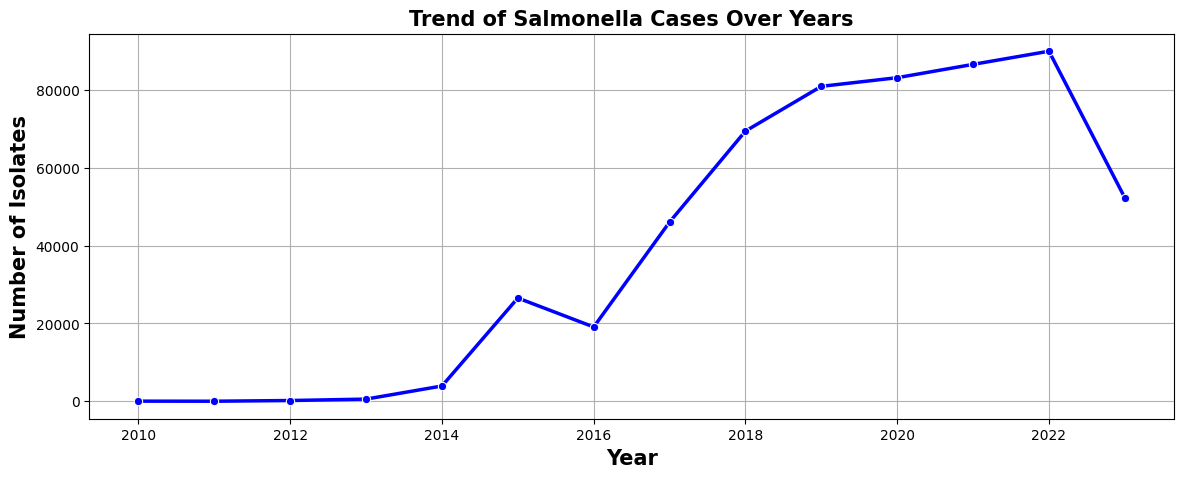

In [65]:
plt.figure(figsize=(14, 5))
yearly_counts = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='b', linewidth=2.5)
plt.title('Trend of Salmonella Cases Over Years', fontsize=15, fontweight='bold')
plt.ylabel('Number of Isolates',fontsize=15,fontweight='bold')
plt.xlabel('Year',fontsize=15,fontweight='bold')
plt.grid(True)
plt.show()

#### **B. Seasonality Analysis**
* **Objective:** To identify if infections spike during specific times of the year (e.g., warmer months).
* **Method:**
    * Aggregated the number of isolates by `Month`.
    * Reindexed the data to sort months chronologically (January to December).
* **Visualization:** The bar plot below displays **"Seasonality: Cases per Month"**, showing the distribution of cases throughout the year.

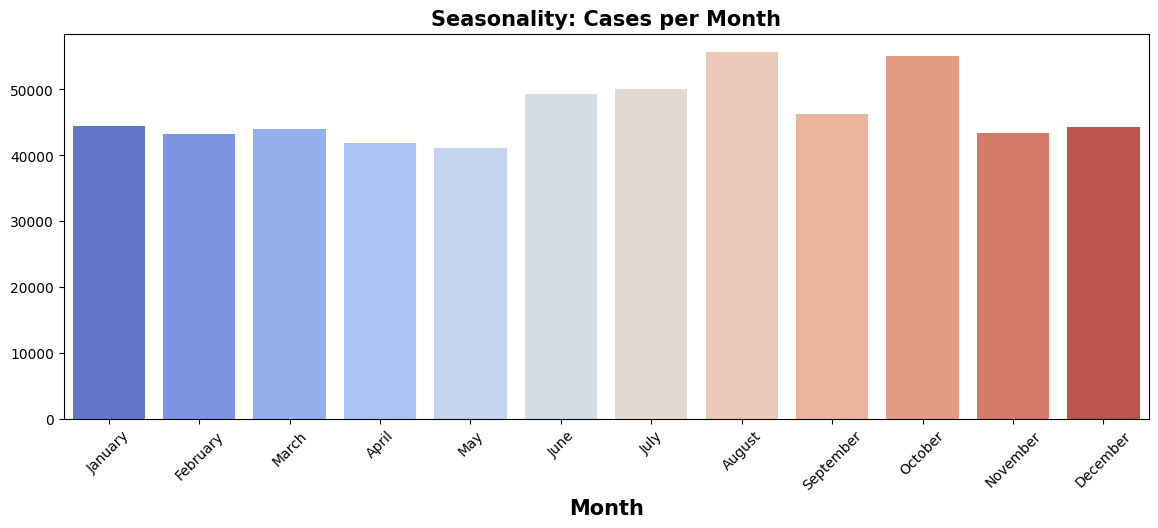

In [66]:
plt.figure(figsize=(14, 5))
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = df['Month'].value_counts().reindex(months_order)
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue=monthly_counts.index, palette='coolwarm')
plt.title('Seasonality: Cases per Month', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Month',fontsize=15,fontweight='bold')
plt.show()

Top 10 Locations

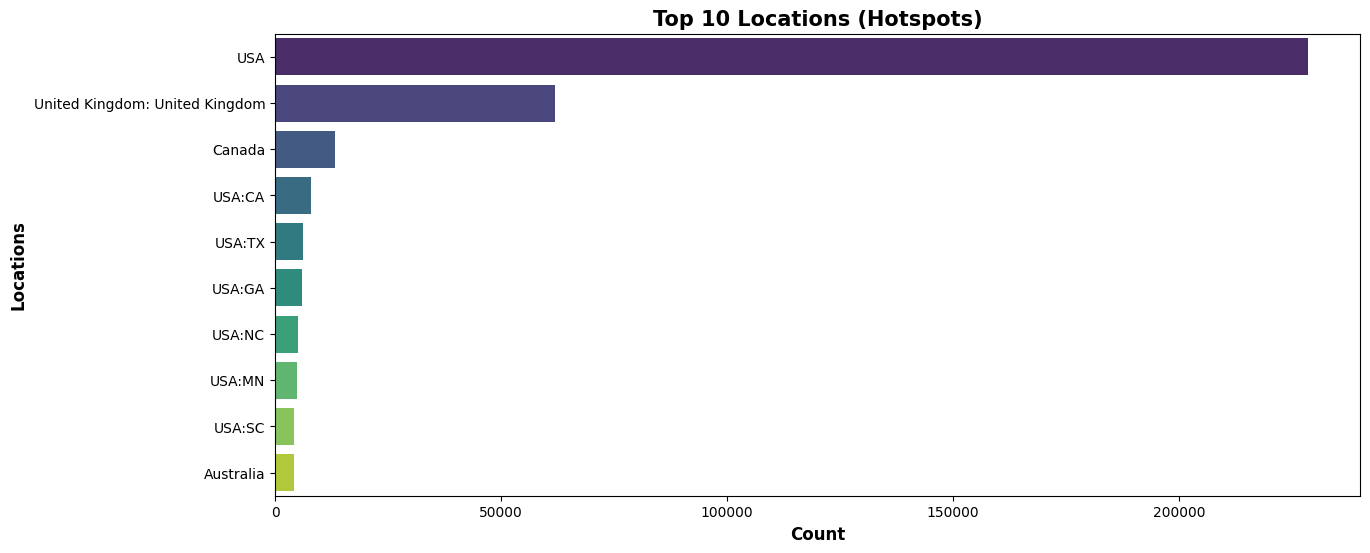

In [67]:
plt.figure(figsize=(14, 6))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values,hue=top_locations.index, palette='viridis')
plt.title('Top 10 Locations (Hotspots)', fontsize=15,fontweight='bold')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.ylabel('Locations',fontsize=12,fontweight='bold')
plt.show()

Top Serovars

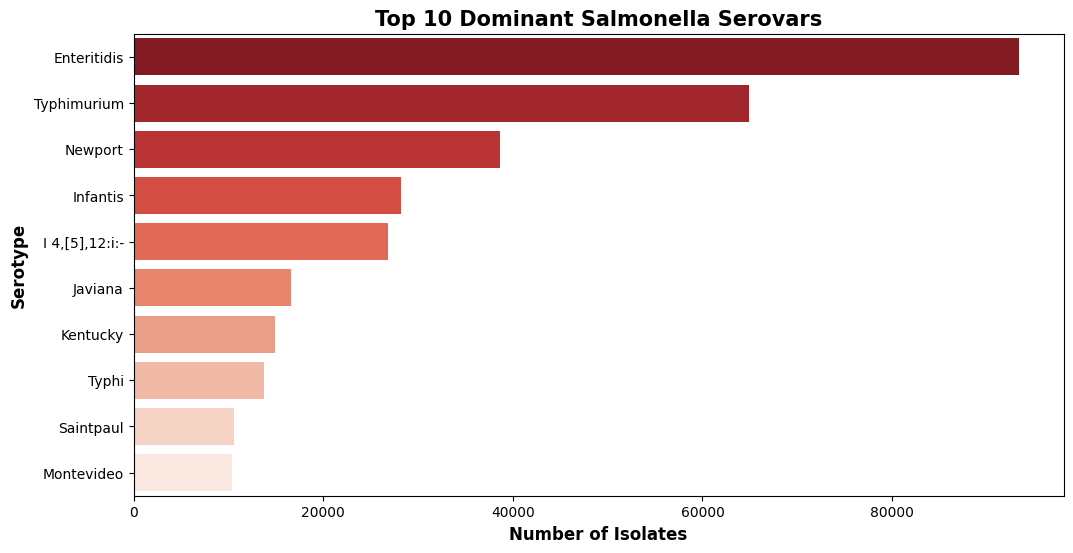

In [68]:
plt.figure(figsize=(12, 6))
top_serovars = df['serotype'].value_counts().head(10)
sns.barplot(x=top_serovars.values, y=top_serovars.index,hue=top_serovars.index, palette='Reds_r')
plt.title('Top 10 Dominant Salmonella Serovars', fontsize=15,fontweight='bold')
plt.xlabel('Number of Isolates',fontsize=12,fontweight='bold')
plt.ylabel('Serotype',fontsize=12,fontweight='bold')
plt.show()

Heatmap relation between isolation source and serovar

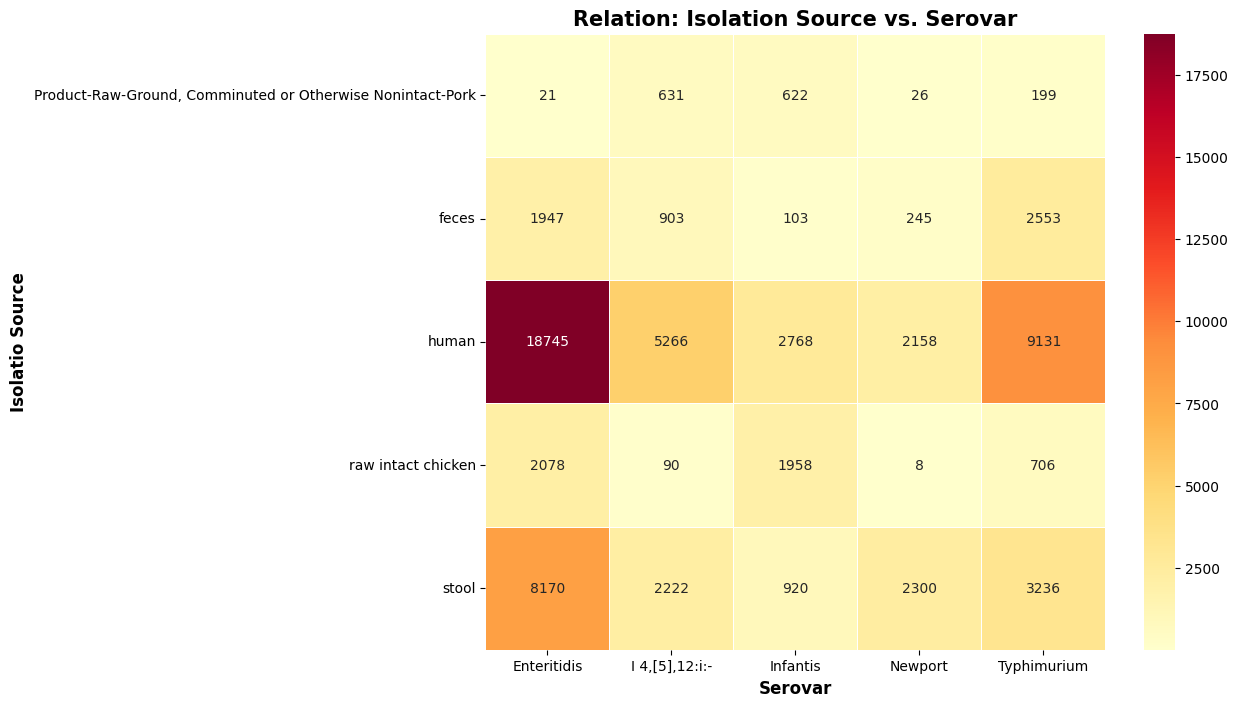

In [69]:
top_5_serovars = df['serotype'].value_counts().head(5).index
top_5_sources = df['Isolation source'].value_counts().head(5).index

subset = df[df['serotype'].isin(top_5_serovars) & df['Isolation source'].isin(top_5_sources)]
pivot_table = pd.crosstab(subset['Isolation source'], subset['serotype'])

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', linewidths=.5)
plt.title('Relation: Isolation Source vs. Serovar', fontsize=15,fontweight='bold')
plt.xlabel('Serovar',fontsize=12,fontweight='bold')
plt.ylabel('Isolatio Source',fontsize=12,fontweight='bold')
plt.show()

Potential Outbreaks

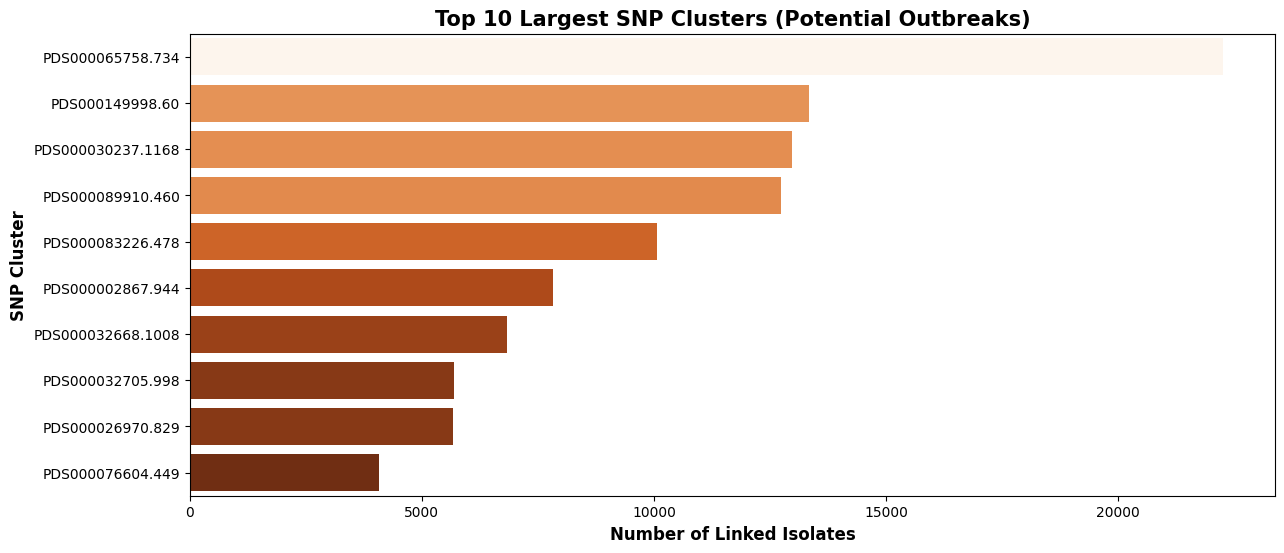

In [70]:
plt.figure(figsize=(14, 6))
top_clusters = df['SNP cluster'].value_counts().head(10)
sns.barplot(y=top_clusters.index, x=top_clusters.values,hue=top_clusters.values, palette='Oranges_r', legend=False)
plt.title('Top 10 Largest SNP Clusters (Potential Outbreaks)', fontsize=15,fontweight='bold')
plt.xlabel('Number of Linked Isolates',fontsize=12,fontweight='bold')
plt.ylabel('SNP Cluster',fontsize=12,fontweight='bold')
plt.show()

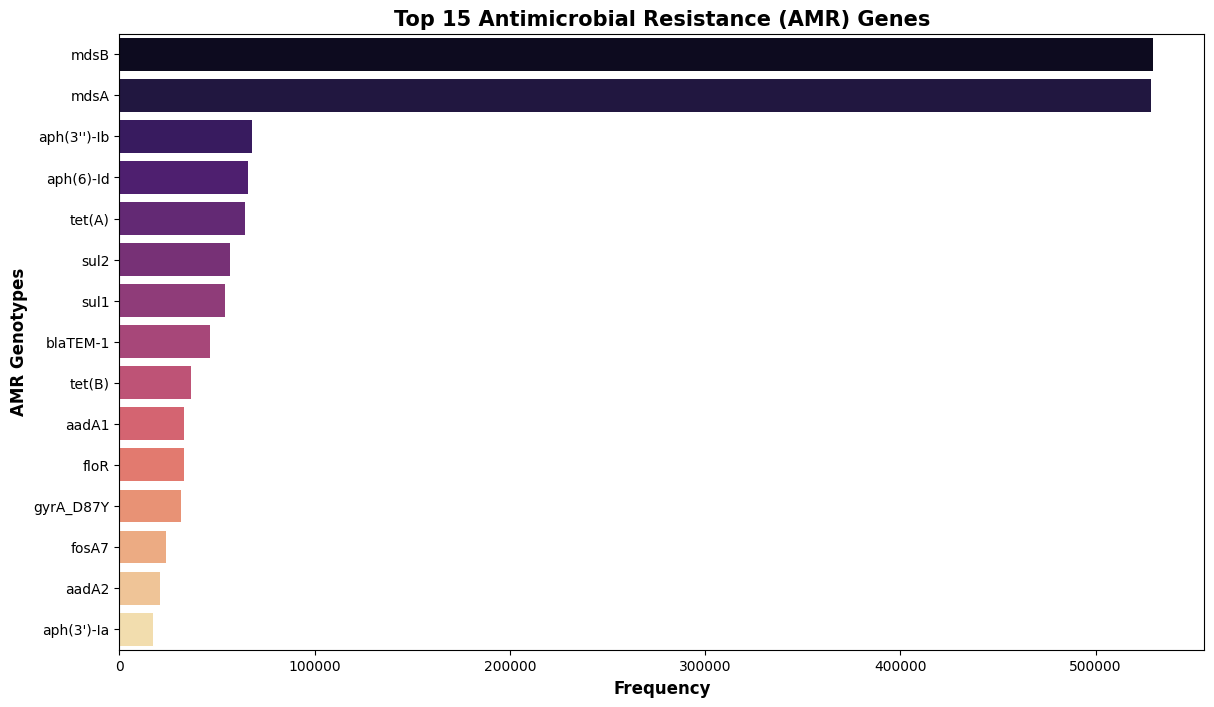

In [73]:
amr_series = df['AMR genotypes'].dropna().str.split(',').explode()
amr_clean = amr_series.apply(lambda x: x.split('=')[0] if '=' in x else x)

plt.figure(figsize=(14, 8))
top_genes = amr_clean.value_counts().head(15)
sns.barplot(y=top_genes.index, x=top_genes.values,hue=top_genes.index,legend=False, palette='magma')
plt.title('Top 15 Antimicrobial Resistance (AMR) Genes', fontsize=15,fontweight='bold')
plt.xlabel('Frequency',fontsize=12,fontweight='bold')
plt.ylabel('AMR Genotypes',fontsize=12,fontweight='bold')
plt.show()

MDR Analysis

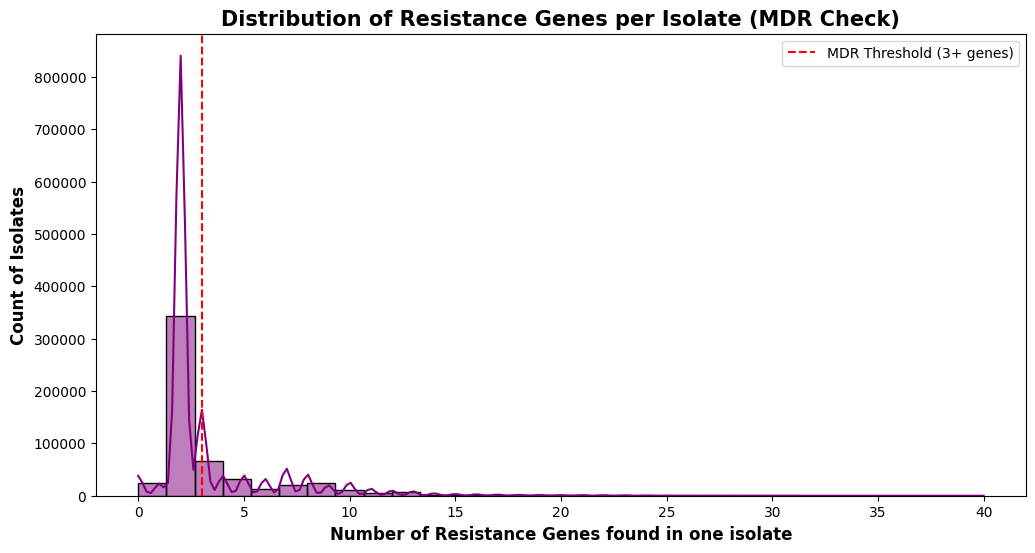

In [76]:
df['AMR_Count'] = df['AMR genotypes'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

plt.figure(figsize=(12, 6))
sns.histplot(df['AMR_Count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Resistance Genes per Isolate (MDR Check)', fontsize=15,fontweight='bold')
plt.xlabel('Number of Resistance Genes found in one isolate',fontsize=12,fontweight='bold')
plt.ylabel('Count of Isolates',fontsize=12,fontweight='bold')
plt.axvline(x=3, color='r', linestyle='--', label='MDR Threshold (3+ genes)')
plt.legend()
plt.show()

### **6. Future Recommendations**

Based on the current workflow, potential next steps for this project include:
1.  **Geospatial Analysis:** Utilize the `Location` column to map outbreaks by region or country.
2.  **AMR Analysis:** Analyze the `AMR genotypes` column to track the rise of antibiotic-resistant strains over time.
3.  **Source Correlation:** Investigate the `Isolation source` (e.g., food, animal, human) to identify primary transmission vectors.

In [8]:
# df.to_csv('updated_pathogen_data.csv', index=False)
# print('DataFrame saved to updated_pathogen_data.csv')